In [1]:
import os

path = "data/"

os.chdir(path)

if os.curdir != path:
    print("Error: Could not change directory to " + path)
    exit(1)

if os.curdir == path:
    print("Success: Changed directory to " + path)
    exit(1)
    
print(os.getcwd())

Error: Could not change directory to data/
c:\GitHub\Metabolic-network-layout-using-biochemical-coordinates\Notebooks\data


In [138]:
import pandas as pd


Pathway = "1515"
x_coord = "qed"
y_coord = "MolLogP"
#y_coord = "ExactMolWt"

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")
# hubs = pd.read_csv("iML1515_hubs_descriptors.csv") #change this manually between core and 1515

hubs = pd.read_csv("e_coli_core_hubs_descriptors.csv") #change this manually between core and 1515


MolLogP_rank_charge_rank


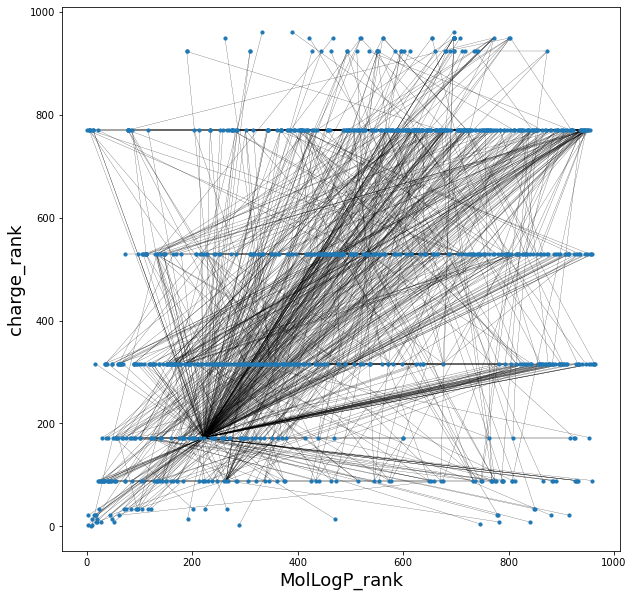

In [138]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()


#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{Pathway}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{Pathway}_targets.csv")

# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)


file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))


pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)




nx.draw(net2,pos_net1,node_size =10, with_labels = False,width = 0.2, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

# nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, with_labels = False, arrows = True, ax = ax)
# nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")
plt.show()


# Plotting of hubs

qed_MolLogP


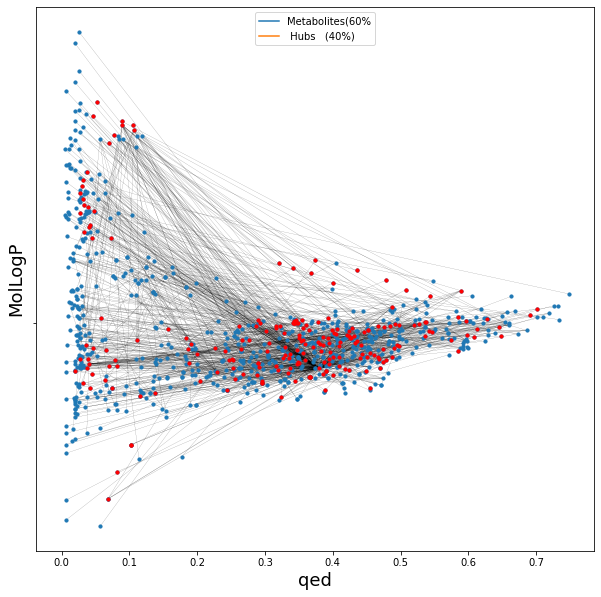

In [51]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()
net3 = nx.DiGraph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{Pathway}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{Pathway}_targets.csv")

# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values
DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]
 

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

hub_sources = hubs["BiGG"]
hub_coordinates = hubs[[x_coord, y_coord]].values

net_data = zip(hub_sources, hub_coordinates) # targets

for e in net_data:
    src = e[0]
    c = e[1]

    net3.add_node(src, pos = c)

pos_net2 = nx.get_node_attributes(net3,'pos')


file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)





# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))


pos_net2_higher = {}
y_off = 0.4  # offset on the y axis
x_off = 0.1

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)

pos_net3_higher = {}
y_off = 0.4  # offset on the y axis
x_off = 1


#labels =  dict(zip(data.BiGG, data.MNXM))


# H = nx.relabel_nodes(net3, labels)



# color_map =[]
# for node in net2:
  #  if node in hubs["BiGG"]:
   #     color_map.append("blue")
    # else:
      #  color_map.append("r")

# color_map = ["cyan" if node in hubs_list else "red" for node in net2.nodes()]

# node_si = [40 if node in hubs_list else 10 for node in net2.nodes()]

# ax.plot('', label='Metabolites(78%') #1515
# ax.plot('', label=' Hubs   (22%)') #1515

ax.plot('', label='Metabolites(60%') #core
ax.plot('', label=' Hubs   (40%)') # core
 
ax.legend(loc = "upper center")

net2.nodes
nx.draw(net2,pos_net1,node_size = 10,  with_labels = False, width =0.1, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "r", node_size = 10, font_size = 40, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net3, pos_net2_higher, font_size =15)

# nx.draw_networkx_labels(net3, pos_net2, labels)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# plt.colorbar(x_coord)


print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/HUBS_{file_name}.png", format="PNG")
plt.show()


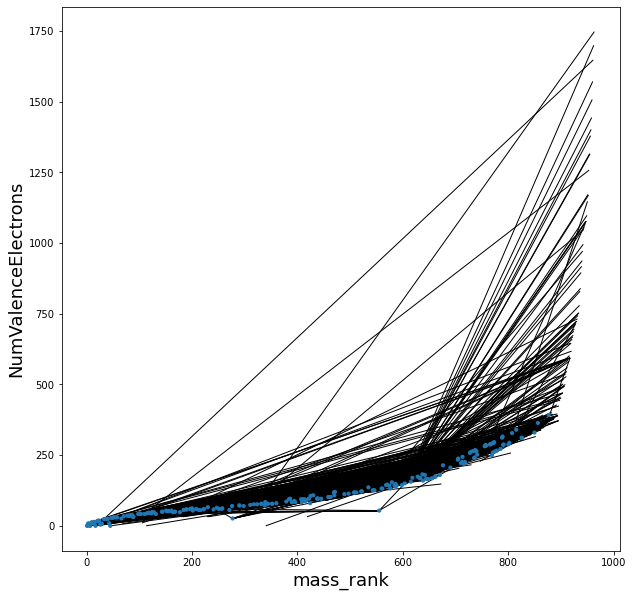

In [53]:

import matplotlib

fig, ax = plt.subplots(figsize=(10,10))

G =nx.DiGraph()

carac = pd.read_csv("iML1515_hubs.csv")

sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    G.add_node(src, pos = c)
    G.add_edge(src,dst)


# Create graph object
# G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# G = nx.from_pandas_edgelist(data2, sources, targets)# create_using=nx.Graph())



# Make types into categories
carac = carac.set_index('BiGG')
carac = carac.reindex(G.nodes())

carac['val'] = pd.Categorical(carac['val'])
carac['val'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

# Draw graph^
nx.draw(G,pos_net1,node_size =10, node_color = carac["val"], cmap=cmap, with_labels = False, arrows = False, ax = ax)
# nx.draw(G, with_labels=True, node_color=carac['val'], cmap=cmap)


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [55]:
print(net2.number_of_edges())

51


qed_MolLogP


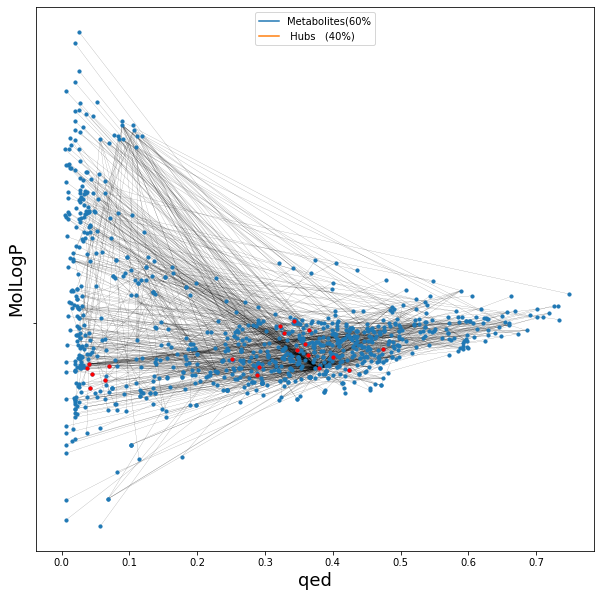

In [139]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.Graph()
net3 = nx.Graph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{Pathway}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{Pathway}_targets.csv")

# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values
DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]
 

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

hub_sources = hubs["BiGG"]
hub_coordinates = hubs[[x_coord, y_coord]].values

net_data = zip(hub_sources, hub_coordinates) # targets

for e in net_data:
    src = e[0]
    c = e[1]

    net3.add_node(src, pos = c)

pos_net2 = nx.get_node_attributes(net3,'pos')


file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)





# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))


pos_net2_higher = {}
y_off = 0.4  # offset on the y axis
x_off = 0.1

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)

pos_net3_higher = {}
y_off = 0.4  # offset on the y axis
x_off = 1


#labels =  dict(zip(data.BiGG, data.MNXM))


# H = nx.relabel_nodes(net3, labels)



# color_map =[]
# for node in net2:
  #  if node in hubs["BiGG"]:
   #     color_map.append("blue")
    # else:
      #  color_map.append("r")

# color_map = ["cyan" if node in hubs_list else "red" for node in net2.nodes()]

# node_si = [40 if node in hubs_list else 10 for node in net2.nodes()]

# ax.plot('', label='Metabolites(78%') #1515
# ax.plot('', label=' Hubs   (22%)') #1515

ax.plot('', label='Metabolites(60%') #core
ax.plot('', label=' Hubs   (40%)') # core
 
ax.legend(loc = "upper center")

net2.nodes
nx.draw(net2,pos_net1,node_size = 10,  with_labels = False, width =0.1, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "r", node_size = 10, font_size = 40, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net3, pos_net2_higher, font_size =15)

# nx.draw_networkx_labels(net3, pos_net2, labels)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# plt.colorbar(x_coord)


print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/HUBS_{file_name}.png", format="PNG")
plt.show()


# Connectivity plots

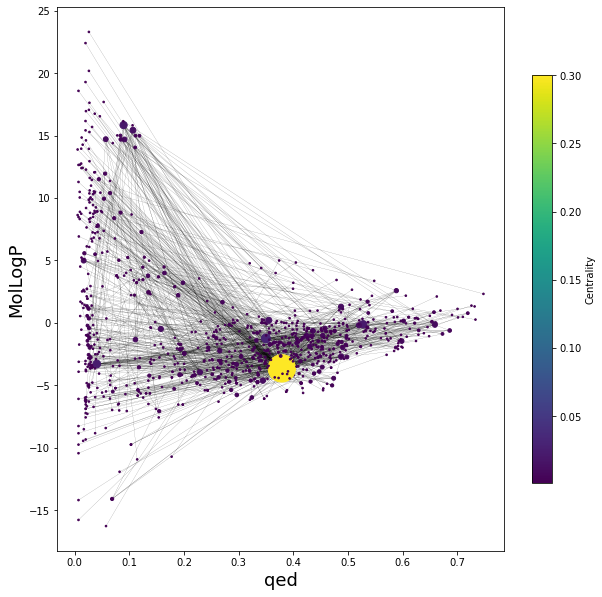

In [146]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np
import scipy.sparse
import matplotlib.colors as mcolors
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(10,10))

# centrality
deg_centrality = nx.degree_centrality(net2)
centrality = np.fromiter(deg_centrality.values(), float)


cent_color = [centrality[i] for i in range(len(centrality))]

# modularity
mod = nx_com.modularity(net2, nx_com.label_propagation_communities(net2))

# plot

# nx.draw_networkx_labels(net2, pos_net1, font_size=10)

nx.draw(net2, pos_net1, node_color=centrality, node_size=centrality*2.5e3, width = 0.1)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

cent = np.fromiter(deg_centrality.values(), float)
sizes = cent / np.max(cent) * 200
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

plt.colorbar(scalarmappaple, shrink = 0.75, label = "Centrality" )
plt.savefig(f"Plots/{Pathway}/Connectivity_{file_name}.png", format="PNG")

plt.show()


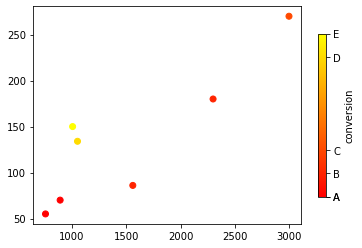

In [135]:
import matplotlib.pyplot as plt
Numberofvisit = [1005, 890, 755, 2300, 3000, 1050,1560]
sales = [150, 70, 55, 180, 270, 134, 86]
conversion = [.14,.07,.07,.08,.09,.13,.08]
plt.scatter(x=Numberofvisit,y=sales,c=conversion,cmap="autumn")
cbar=plt.colorbar(label="conversion", orientation="vertical",shrink=.75)
cbar.set_ticks([0.07,.07, 0.08, 0.09, 0.13,.14])
cbar.set_ticklabels(["A","A", "B", "C", "D","E"])
plt.show()

In [129]:
cent_list = centrality.tolist()
print(cent_list)

[0.02, 0.1, 0.02, 0.04, 0.18, 0.06, 0.04, 0.02, 0.06, 0.02, 0.02, 0.02, 0.06, 0.02, 0.02, 0.14, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.1, 0.02, 0.02, 0.02, 0.44, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


TypeError: 'LineCollection' object is not iterable

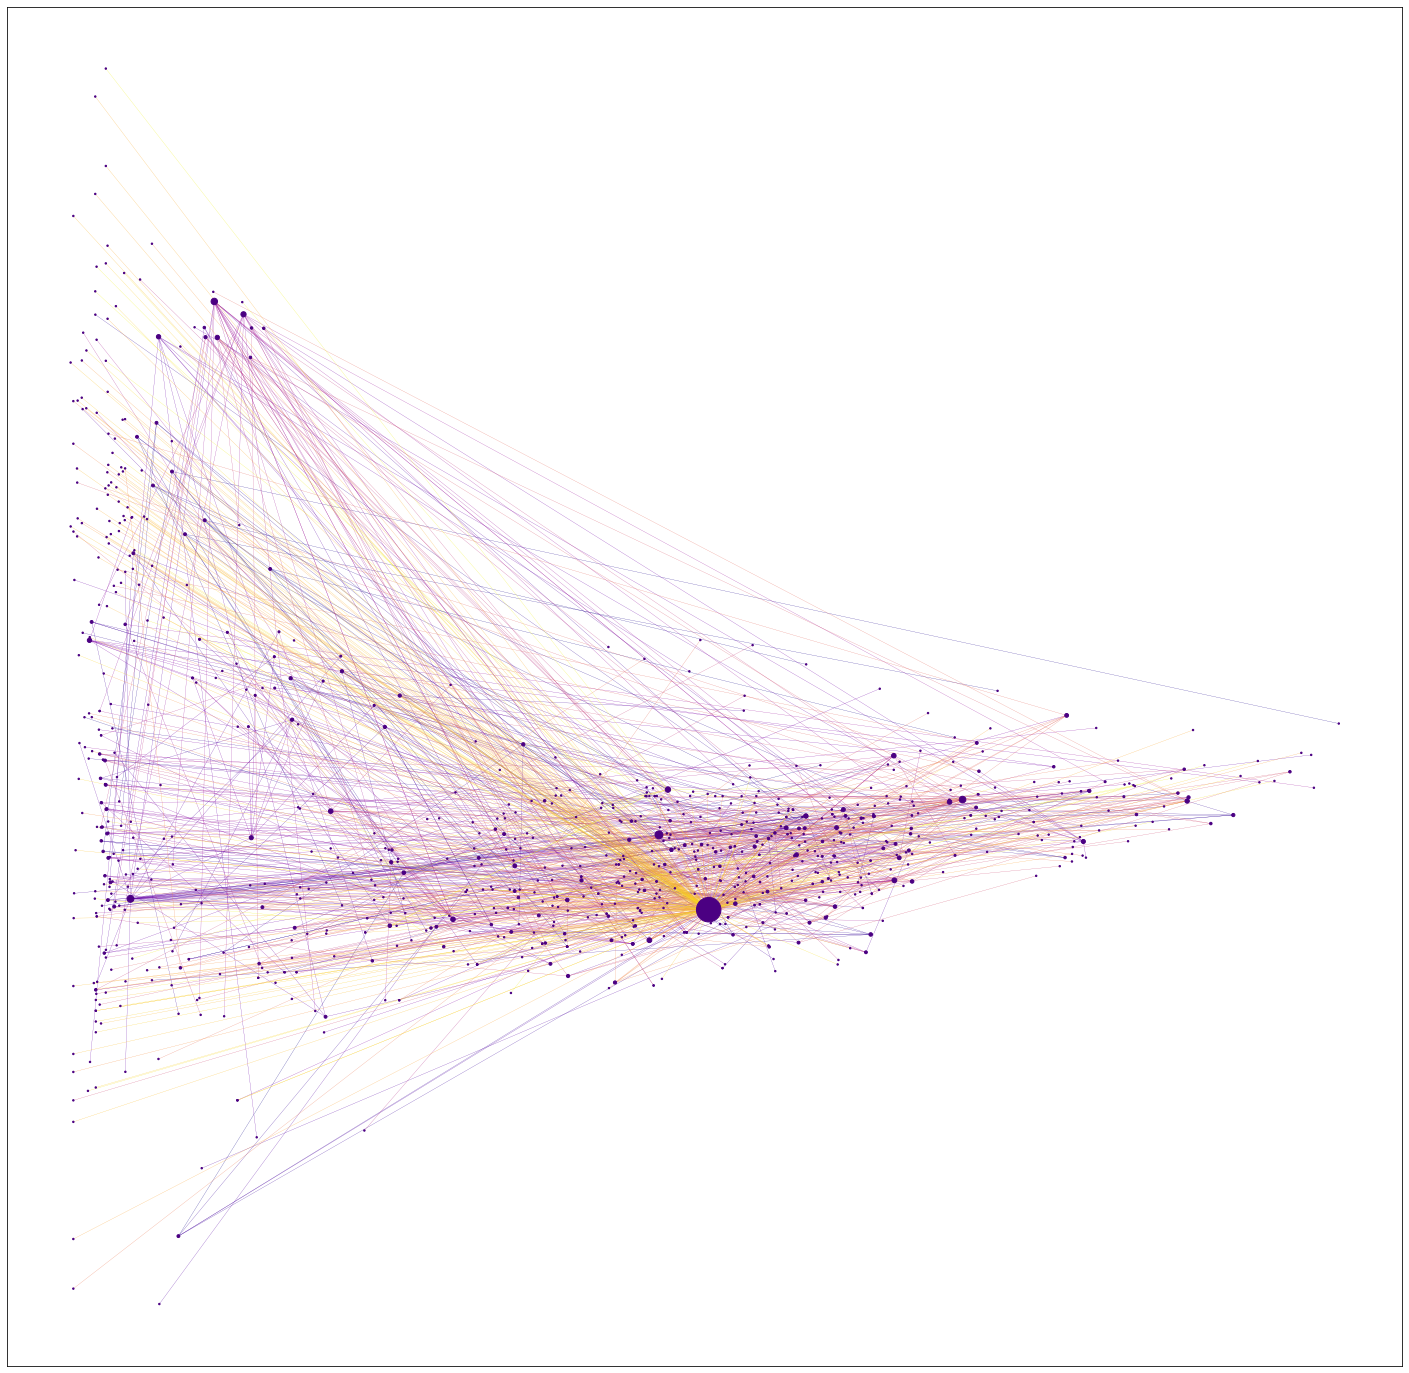

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np
import scipy.sparse

fig, ax = plt.subplots(figsize=(25,25))

# centrality
deg_centrality = nx.degree_centrality(net2)
centrality = np.fromiter(deg_centrality.values(), float)

# modularity
mod = nx_com.modularity(net2, nx_com.label_propagation_communities(net2))



node_sizes = [0.1 +  i for i in range(len(net2))]
M = net2.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma


# plot

nodes = nx.draw_networkx_nodes(net2, pos_net1, node_size=centrality*2e3, node_color="indigo")
edges = nx.draw_networkx_edges(
    net2,
    pos_net1,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=0.2,
)
pc = mpl.collections.PatchCollection(edges)

# pos = nx.spring_layout(net2)
# nx.draw(net2, pos_net1, node_color=centrality, node_size=centrality*2e3, width = 0.2)
# nx.draw_networkx_labels(net2, pos_net1, font_size=10)


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.colorbar(pc)


plt.savefig(f"Plots/{Pathway}/Connectivity_{file_name}.png", format="PNG")

plt.show()


C:\Users\meide\AppData\Local\Temp\ipykernel_19728\380245897.py:32: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(pc)


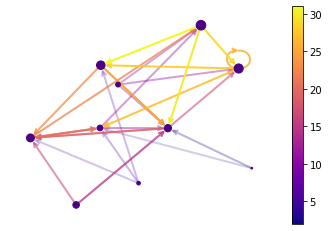

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

TypeError: 'LineCollection' object is not subscriptable

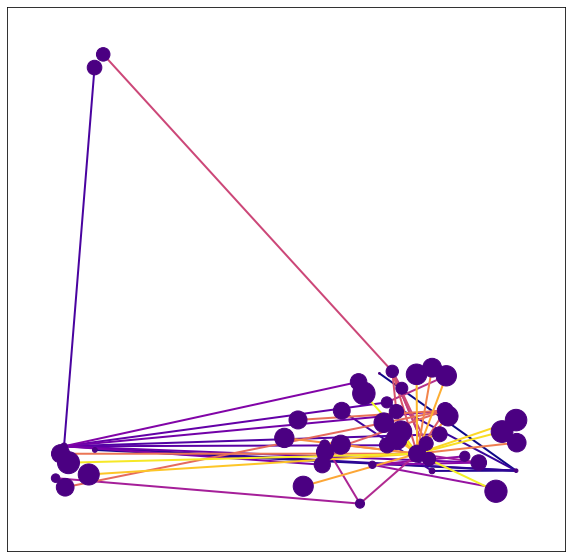

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


fig, ax = plt.subplots(figsize=(10,10))
seed = 13648  # Seed random number generators for reproducibility
# G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
# pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(net2))]
M = net2.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(net2, pos_net1, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    net2,
    pos_net1,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc).ax

ax = plt.gca()
ax.set_axis_off()
plt.show()

TypeError: 'LineCollection' object is not iterable

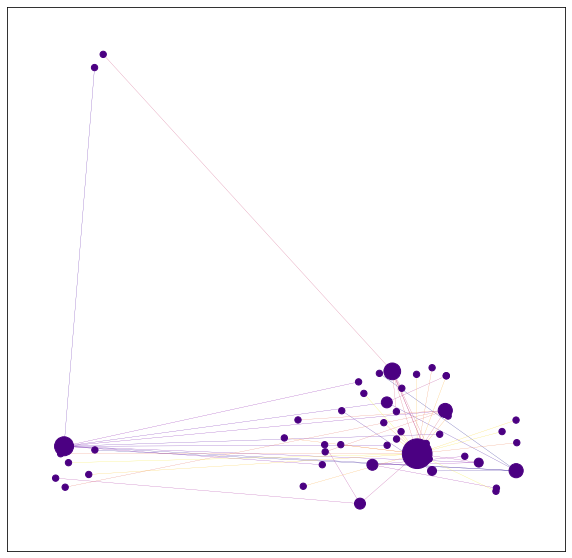

In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


fig, ax = plt.subplots(figsize=(10,10))
seed = 13648  # Seed random number generators for reproducibility
G = nx.Graph()
pos = pos_net1

pos = nx.spring_layout(G, seed=seed)

node_sizes = [0.1 +  i for i in range(len(net2))]
M = net2.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(net2, pos_net1, node_size=centrality*2e3, node_color="indigo")
edges = nx.draw_networkx_edges(
    net2,
    pos_net1,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=0.2,
)
# set alpha value for each edge
# for i in range(M):
#   edges[i].set_alpha(edge_alphas[i])

# pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.jet, linewidth=0.2,antialiased = True)
pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)
plt.colorbar(pc)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

ValueError: Invalid RGBA argument: 2

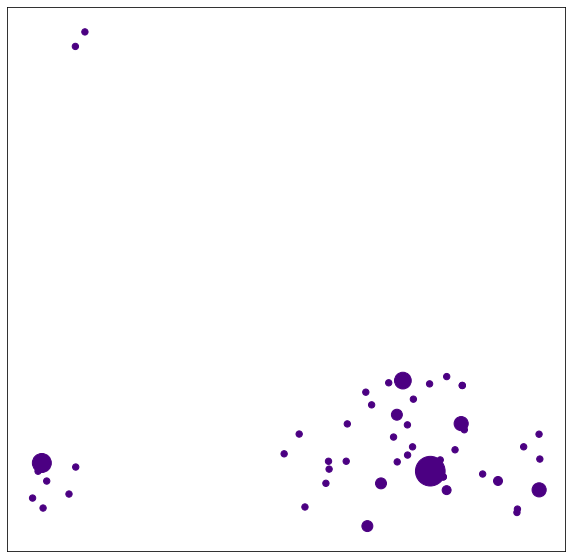

In [76]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl



net2 = nx.Graph()
net3 = nx.Graph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{Pathway}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{Pathway}_targets.csv")

# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values
DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]
 

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

hub_sources = hubs["BiGG"]
hub_coordinates = hubs[[x_coord, y_coord]].values

net_data = zip(hub_sources, hub_coordinates) # targets

for e in net_data:
    src = e[0]
    c = e[1]

    net3.add_node(src, pos = c)

pos_net2 = nx.get_node_attributes(net3,'pos')


file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)





# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))


pos_net2_higher = {}
y_off = 0.4  # offset on the y axis
x_off = 0.1

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)

pos_net3_higher = {}
y_off = 0.4  # offset on the y axis
x_off = 1


nodes = nx.draw_networkx_nodes(net2, pos_net1, node_size=centrality*2e3, node_color="indigo")
edges = nx.draw_networkx_edges(
    net2,
    pos_net1,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)


cmap = plt.cm.plasma

pc = mpl.collections.PatchCollection(edges, cmap=cmap)



# ax.plot('', label='Metabolites(78%') #1515
# ax.plot('', label=' Hubs   (22%)') #1515

ax.plot('', label='Metabolites(60%') #core
ax.plot('', label=' Hubs   (40%)') # core
 
ax.legend(loc = "upper center")


nx.draw(net2,pos_net1,node_size=centrality*2e3, node_color= "indigo", with_labels = False,edge_color = edge_colors,edge_cmap=cmap, width =0.2, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

# nx.draw(net3,pos_net2,node_color = "r", node_size = 10, font_size = 40, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net3, pos_net2_higher, font_size =15)

# nx.draw_networkx_labels(net3, pos_net2, labels)




limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
# plt.colorbar(x_coord)
plt.colorbar(pc)

print(DescriptorPair)

# plt.savefig(f"Plots/{Pathway}/HUBS_{file_name}.png", format="PNG")
plt.show()


# Readable layout maps

NameError: name 'pc' is not defined

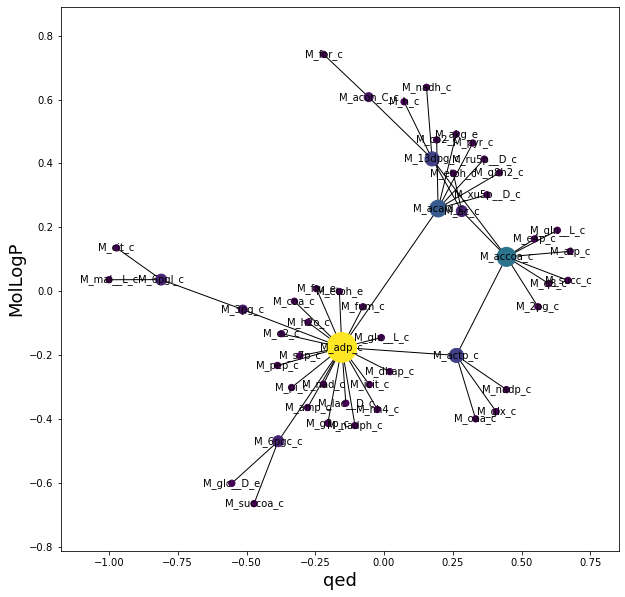

In [79]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np

fig, ax = plt.subplots(figsize=(10,10))

# centrality
deg_centrality = nx.degree_centrality(net2)
centrality = np.fromiter(deg_centrality.values(), float)

# modularity
mod = nx_com.modularity(net2, nx_com.label_propagation_communities(net2))

# plot
pos = nx.spring_layout(net2)
nx.draw(net2, pos, node_color=centrality, node_size=centrality*2e3)
nx.draw_networkx_labels(net2, pos, font_size=10)


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
#plt.colorbar(nx.get_edge_attributes(net2,pos))
plt.colorbar(pc)

plt.savefig(f"Plots/{Pathway}/Spring_{file_name}.png", format="PNG")

plt.show()

In [113]:

a = ArcPlot(net2)
b = ArcPlot(net3)
a, b
plt.tight_layout()
plt.autoscale()

TypeError: __init__() takes 2 positional arguments but 3 were given

c:\Users\meide\.conda\envs\rdkit\lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


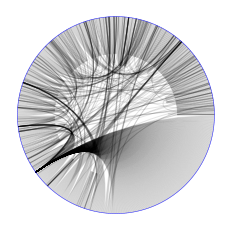

In [115]:
from nxviz import CircosPlot

c = CircosPlot(net2)
c

AttributeError: 'DiGraph' object has no attribute 'keys'

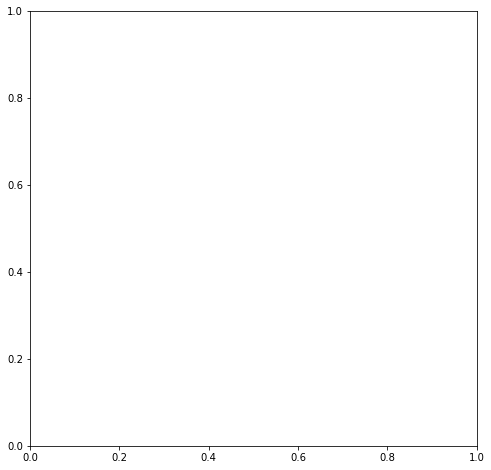

In [121]:
from hiveplot import HivePlot

nodes_cmap = {}
nodes_cmap['BiGG'] = 'dodgerblue'
nodes_cmap['target'] = 'tomato'



h = HivePlot(net3,edges = target["target"], node_colormap= nodes_cmap)
h